In [319]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [320]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [580]:
def deletCols(df, keep):
    remove = []
    for i in range(len(df.columns)):
        column = df.columns[i]
        if(column not in keep):
            remove.append(column)

    return df.drop(remove, axis=1)

def renameCols(df, suffix):
    for column in df.columns:
        df = df.rename(columns={column: f'{column}_{suffix}'})
    
    return df

def setCol(df, idx):
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])

    return df

def dfStringToNum(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = 0
    return df

def dropNAN(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = np.nan
    return df
    

<h3>GHG For Every Country</h3>

In [829]:
countries = []
#Transposing Data
ghg = pd.read_csv("Macro/GHG Energy.csv")
#reset column header to year
ghg.columns = ghg.iloc[2]
ghg = ghg.reset_index(drop=True)
ghg.columns.name = None
#move years (the current column header) to the index
ghg = ghg.transpose()
#set country names as column headers
ghg = setCol(ghg, 0)
#remove name
ghg.columns.name = None
#remove all columns with header name null
ghg = ghg.loc[:, ghg.columns.notnull()]

#Remove columns
col_keep = ["World"]
start = 0
end = 0

for i in range(len(ghg.columns)):
    column = ghg.columns[i]
    if column == "Canada":
        start = i
    if column == "Middle East":
        end = i

for i in range(start, end):
    col_keep.append(ghg.columns[i])

countries = col_keep

ghg = deletCols(ghg, col_keep)

ghg = renameCols(ghg, "ghg")
ghg = dfStringToNum(ghg)

ghg.head()

,World_ghg,Canada_ghg,Chile_ghg,Mexico_ghg,United States_ghg,OECD Americas_ghg,Australia_ghg,Israel_ghg,Japan_ghg,Korea_ghg,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1971,16121,366,22,118,4581,5118,151,14,762,56,...,1,65,5,13,13,88,13,36,1,525
1972,16840,385,22,131,4825,5395,157,15,799,58,...,2,66,5,13,14,104,14,40,1,533
1973,17771,404,21,143,4987,5589,166,16,909,72,...,2,59,7,13,15,124,14,46,2,561
1974,17722,413,21,156,4823,5448,181,16,896,75,...,2,48,7,13,15,139,17,51,2,558
1975,17768,404,18,163,4631,5249,189,17,860,82,...,2,40,6,13,17,142,22,56,2,579


<h3>Investment: R&D per thousands of GDP</h3>

In [835]:
rd = pd.read_csv("Macro/R&D.csv")
rd = setCol(rd, 0)

for index, row in rd.iterrows():
    if(row["Indicator"].strip() != "RD&D per thousand units of GDP"):
        rd = rd.drop(index)

rd = rd.drop(columns="Indicator")
rd.columns.name = None
rd = rd.transpose()
rd = setCol(rd, 0)
for column in rd.columns:
    if(column not in countries):
        rd = rd.drop(column, axis=1)
rd.columns.name = None
rd = rd.drop(rd.index[-1])
rd = renameCols(rd, "r&d")
rd = dfStringToNum(rd)

rd.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Norway_r&d,Poland_r&d,Portugal_r&d,Slovak Republic_r&d,Spain_r&d,Sweden_r&d,Switzerland_r&d,Turkey_r&d,United Kingdom_r&d,United States_r&d
1974,0,0,1.262,0,0.854,0,0,0,0,0,...,0.154,0,0,0,0.311,0.227,0.043,0,1.033,0.523
1975,0,0,1.456,0,0.782,0,0.215,0,0,0,...,0.092,0,0,0,0.304,0.57,0.054,0,1.015,0.727
1976,0,0,1.329,0,0.778,0,0.223,0,0,0,...,0.093,0,0,0,0.305,0.498,0.068,0,1.022,0.811
1977,0,0.321,1.098,0,0.824,0,0.328,0,0,0,...,0.103,0,0,0,0.238,0.649,0.177,0,0.821,1.183
1978,0,0.398,0.84,0,1.023,0,0.41,0,0,0,...,0.649,0,0,0,0.292,0.784,0.368,0,0.961,1.302


In [845]:
df = rd.join(ghg)
df.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1974,0,0,1.262,0,0.854,0,0,0,0,0,...,2,48,7,13,15,139,17,51,2,558
1975,0,0,1.456,0,0.782,0,0.215,0,0,0,...,2,40,6,13,17,142,22,56,2,579
1976,0,0,1.329,0,0.778,0,0.223,0,0,0,...,3,41,5,15,16,176,24,66,2,650
1977,0,0.321,1.098,0,0.824,0,0.328,0,0,0,...,3,40,5,15,14,189,25,67,2,674
1978,0,0.398,0.84,0,1.023,0,0.41,0,0,0,...,3,45,6,4,16,190,23,57,2,667


In [ ]:
for i in df.columns:
    df[i] = df[i].astype(float)

df.index = df.index.astype(int)

In [846]:
def getRdGhgList(country):
    rd_list = df[f"{country}_r&d"].tolist()
    ghg_list = df[f"{country}_ghg"].tolist()
    year_list = df.index.tolist()
    
    return [rd_list, ghg_list, year_list]

def getRdGhgDf(country):
    df[f"{country}_r&d"] = df[f"{country}_r&d"].astype(float)
    df[f"{country}_ghg"] = df[f"{country}_ghg"].astype(float)
    return df[[f"{country}_r&d", f"{country}_ghg"]]


<AxesSubplot:xlabel='Canada_r&d', ylabel='Canada_ghg'>

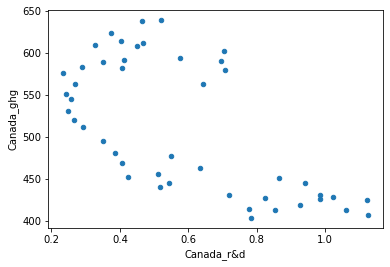

In [847]:
test = getRdGhgDf("Canada")
test.plot(kind="scatter", x="Canada_r&d", y="Canada_ghg")

<h3>Our World in Data</h3>

In [848]:
owid = pd.read_csv("Macro/owid-energy-data.csv")
owid

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [849]:
def binarySearch(arr, start, end, val):
    if(start <= end):
        mid = math.floor((start + end) / 2)
        if arr[mid] > val:
            #we can - 1 since we have just checked the mid index
            return binarySearch(arr, start, mid - 1, val)
        elif arr[mid] < val:
            return binarySearch(arr, mid + 1, end, val)
        else:
            return mid


In [850]:
def getOwidCountry(country):
    row_num = binarySearch(owid["country"], 0, len(owid["country"]) - 1, country)
    year_of_row = owid.iloc[row_num]["year"]
    start_slice = year_of_row - 1900
    end_slice = 2020 - year_of_row
    df = owid.iloc[row_num - start_slice : end_slice + row_num + 1]
    extra = []
    for i in range(df.shape[0]):
        if str(df.iloc[[i]]["country"].values[0]) != country:
            extra.append(df.iloc[[i]].index.values[0])

    return df.drop(extra)

<AxesSubplot:xlabel='year'>

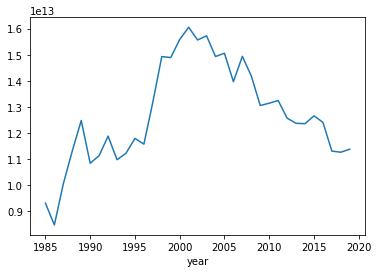

In [851]:
c = getOwidCountry("Canada")
c = c.set_index(c["year"])
c.columns.name = None

def getProductionConsumption(energy_type, production, df):
    start = df.index.values[0]
    country = df["country"][start]
    if production:
        df[f"{energy_type}_electricity_{country}"] = df[f"{energy_type}_electricity"]
        return df[f"{energy_type}_electricity_{country}"]
    else:
        arr = []
        for i in range(df.shape[0]):
            total_elec = df["per_capita_electricity"][start+i] * df["population"][start+i]
            arr.append(total_elec * df[f"{energy_type}_share_elec"][start+i])
        df[f"elec_consumption_{energy_type}_{country}"] = arr
        return df[f"elec_consumption_{energy_type}_{country}"]

test = getProductionConsumption("fossil", False, c)
test.dropna().plot()


<h3>Full Data</h3>

In [852]:
full_df = []
energy = ['coal', 'fossil', 'gas', 'oil', 'hydro', 'nuclear', 'solar', 'wind', 'biofuel', 'renewables']
all_countries = owid['country'].unique()
for country in all_countries:
    if(country in countries):
        d = getOwidCountry(country)
        d = d.set_index(d["year"])
        d.columns.name = None
        d = d.drop(["year", "iso_code"], axis=1)
        for type in energy:
            d = d.join(getProductionConsumption(type, False, d), rsuffix='1')
            d = d.drop(f"elec_consumption_{type}_{country}1", axis=1)
            d = d.rename(columns={f"elec_consumption_{type}_{country}" : f"elec_consumption_{type}"})
        for i in d.columns:
            if i != "country":
                d = d.rename(columns={i : i+f"_{country}"})
        full_df.append(d)

for i in range(1, len(full_df)):
    country = full_df[i]["country"].values[0]
    full_df[i] = full_df[i].drop("country", axis=1)
    full_df[0] = full_df[0].join(full_df[i])

final_df = full_df[0].drop("country", axis=1)

full_df[0]

,country,coal_prod_change_pct_Africa,coal_prod_change_twh_Africa,gas_prod_change_pct_Africa,gas_prod_change_twh_Africa,oil_prod_change_pct_Africa,oil_prod_change_twh_Africa,energy_cons_change_pct_Africa,energy_cons_change_twh_Africa,biofuel_share_elec_Africa,...,elec_consumption_coal_Zimbabwe,elec_consumption_fossil_Zimbabwe,elec_consumption_gas_Zimbabwe,elec_consumption_oil_Zimbabwe,elec_consumption_hydro_Zimbabwe,elec_consumption_nuclear_Zimbabwe,elec_consumption_solar_Zimbabwe,elec_consumption_wind_Zimbabwe,elec_consumption_biofuel_Zimbabwe,elec_consumption_renewables_Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1900,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,Africa,67.810,4.530,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,Africa,49.068,5.500,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,Africa,35.697,5.965,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,Africa,12.880,2.921,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Africa,-3.991,-73.097,2.653,52.707,-1.012,-45.882,1.432,70.251,NaN,...,4.311806e+11,4.311806e+11,0.0,0.0,4.940035e+11,0.0,7.979610e+08,0.0,1.279554e+10,5.075970e+11
2016,Africa,1.235,21.713,0.959,19.564,-5.730,-257.263,2.622,130.431,NaN,...,3.714846e+11,3.714846e+11,0.0,0.0,2.954990e+11,0.0,9.010156e+08,0.0,1.470294e+10,3.111029e+11
2017,Africa,3.647,64.936,8.873,182.702,5.572,235.821,2.256,115.188,NaN,...,3.218546e+11,3.218546e+11,0.0,0.0,3.929035e+11,0.0,1.096434e+09,0.0,1.510155e+10,4.091015e+11


In [853]:
final_df

,coal_prod_change_pct_Africa,coal_prod_change_twh_Africa,gas_prod_change_pct_Africa,gas_prod_change_twh_Africa,oil_prod_change_pct_Africa,oil_prod_change_twh_Africa,energy_cons_change_pct_Africa,energy_cons_change_twh_Africa,biofuel_share_elec_Africa,biofuel_elec_per_capita_Africa,...,elec_consumption_coal_Zimbabwe,elec_consumption_fossil_Zimbabwe,elec_consumption_gas_Zimbabwe,elec_consumption_oil_Zimbabwe,elec_consumption_hydro_Zimbabwe,elec_consumption_nuclear_Zimbabwe,elec_consumption_solar_Zimbabwe,elec_consumption_wind_Zimbabwe,elec_consumption_biofuel_Zimbabwe,elec_consumption_renewables_Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,67.810,4.530,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,49.068,5.500,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,35.697,5.965,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,12.880,2.921,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,-3.991,-73.097,2.653,52.707,-1.012,-45.882,1.432,70.251,NaN,NaN,...,4.311806e+11,4.311806e+11,0.0,0.0,4.940035e+11,0.0,7.979610e+08,0.0,1.279554e+10,5.075970e+11
2016,1.235,21.713,0.959,19.564,-5.730,-257.263,2.622,130.431,NaN,NaN,...,3.714846e+11,3.714846e+11,0.0,0.0,2.954990e+11,0.0,9.010156e+08,0.0,1.470294e+10,3.111029e+11
2017,3.647,64.936,8.873,182.702,5.572,235.821,2.256,115.188,NaN,NaN,...,3.218546e+11,3.218546e+11,0.0,0.0,3.929035e+11,0.0,1.096434e+09,0.0,1.510155e+10,4.091015e+11


In [854]:
final_df.to_csv('final.csv', index=True)

In [861]:
final = pd.read_csv("final.csv")
final = final.set_index(final['year'])
final.index.name=None
final = final.drop('year', axis=1)

In [862]:
final = final.join(df)

In [863]:
final = final.iloc[100:, :]

<h3>Does a reduction in fossil fuels consumption correlate to a reduction in GHG</h3>

<h3>Is the reduction in fossil fuel consumption related to a decrease in fossil fuel production</h3>

In [864]:
c_vs_p = final

def graph_C_vs_P(country):
    temp = c_vs_p[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'fossil_consumption_{country}'] = c_vs_p[[f"fossil_fuel_consumption_{country}"]]
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'fossil_consumption_{country}')

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


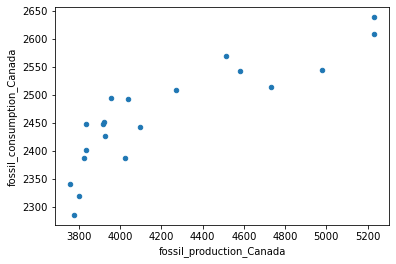

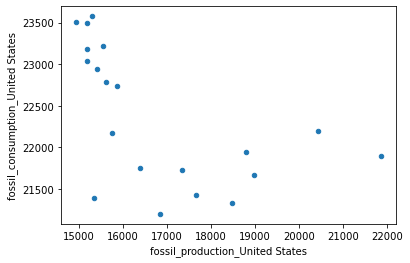

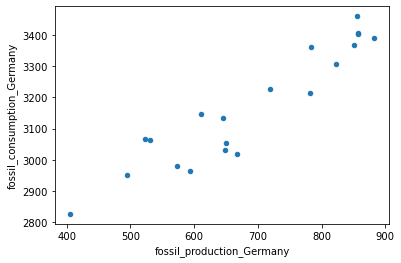

In [871]:
graph_C_vs_P("Canada")
graph_C_vs_P("United States")
graph_C_vs_P("Germany")

<h3>Is fossil fuel production reduction correlated with clean energy production or consumption</h3>

In [872]:
fossilP_vs_cleanP = final

def graphFossilP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp = temp.sum(axis=1)
    temp.plot()

def graphFossilP_vs_cleanP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_production_{country}'] = fossilP_vs_cleanP[[f"renewables_electricity_{country}"]]
    temp.plot(kind="scatter", x=f'clean_production_{country}', y=f"fossil_production_{country}")

def graphFossilP_vs_cleanC(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_consumption_{country}'] = fossilP_vs_cleanP[[f"renewables_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'clean_consumption_{country}', y=f"fossil_production_{country}")

#which clean energy helps reduce fossil fuel consumption
def graphFossilP_vs_C(energy, country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'fossil_production_{country}'] = temp[f'fossil_production_{country}'] / 1000000000
    temp[f'{energy}_consumption_{country}'] = fossilP_vs_cleanP[[f"{energy}_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'{energy}_consumption_{country}', y=f"fossil_production_{country}")

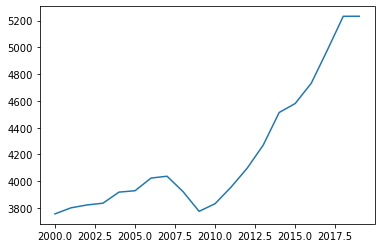

In [873]:
graphFossilP("Canada")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

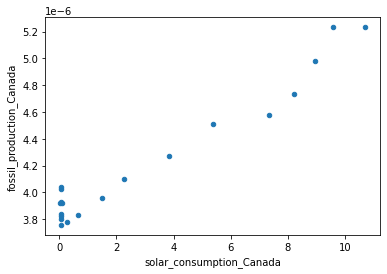

In [874]:
# graphFossilP_vs_cleanC("Canada")
# graphFossilP_vs_cleanC("United States")
# graphFossilP_vs_cleanC("China")
graphFossilP_vs_C("solar", "Canada")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


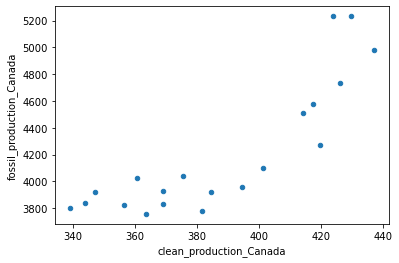

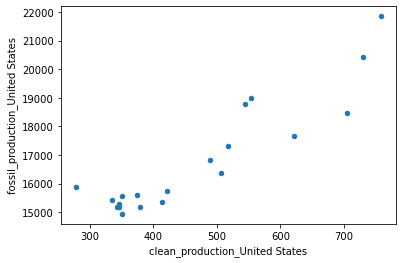

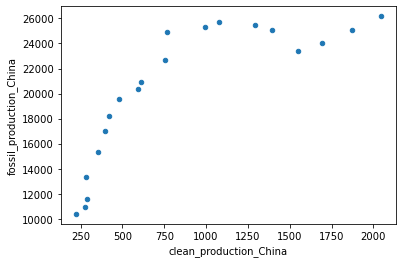

In [869]:
graphFossilP_vs_cleanP("Canada")
graphFossilP_vs_cleanP("United States")
graphFossilP_vs_cleanP("China")

<h3>Is clean energy production or consumption correlated with investment into R&D</h3>

<h3>Production to Consumption Ratio</h3>

In [ ]:
ratio = final

non_clean_energy = ["coal", "oil", "gas", "fossil"]
def p_vs_c_ratio(energy, country):
    if(energy in non_clean_energy):
        if(energy == "fossil"):
            temp = ratio[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
            temp[f'fossil_production_{country}'] = temp.sum(axis=1)
            temp[f'{energy}_consumption_{country}'] = ratio[[f"fossil_fuel_consumption_{country}"]]
            temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'{energy}_consumption_{country}')
        else:
            temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_production_{country}"]]
            temp.plot(kind="scatter", x=f"{energy}_production_{country}", y=f'{energy}_consumption_{country}')
    else:
        temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_electricity_{country}"]]
        temp.plot(kind="scatter", x=f"{energy}_electricity_{country}", y=f'{energy}_consumption_{country}')



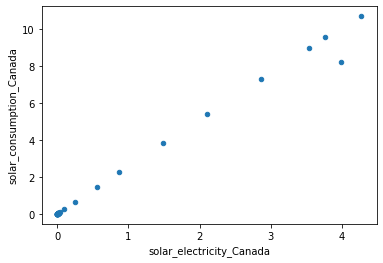

In [875]:
p_vs_c_ratio("solar", "Canada")